1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

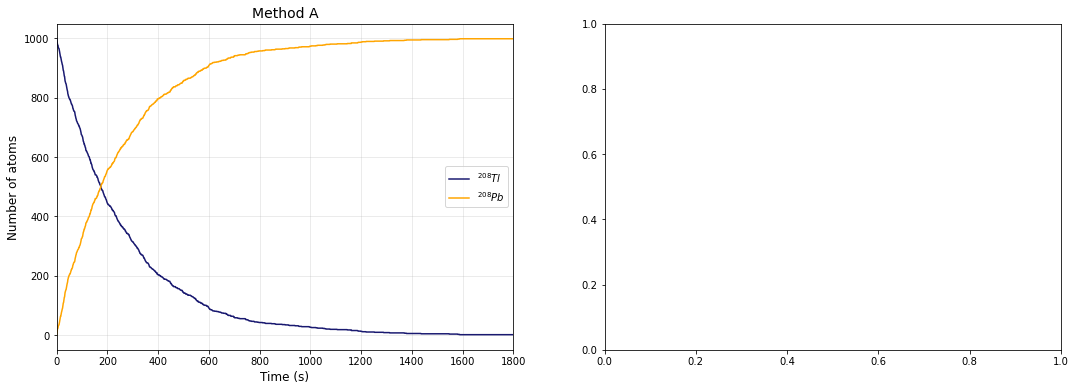

In [7]:
def p1(t,tau):
    return 1-2**(-t/tau)

tau=3.052*60 
T=int(10*tau)
N_Tl=np.zeros(T)
N_Pb=np.zeros(T)
N_Tl[0]=1000 
N_Pb[0]=0 

for i in range(0,T-1):
    prob=p1(1,tau) 
    N_Tl[i+1]=N_Tl[i]
    N_Pb[i+1]=N_Pb[i]
    for j in range (0, int(N_Tl[i])):
        a=np.random.rand()
        if a < prob: 
            N_Tl[i+1] += -1
            N_Pb[i+1] += 1

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax1.plot(np.arange(T), N_Tl, color='midnightblue', label=r'${}^{208}Tl$')
ax1.plot(np.arange(T), N_Pb, color='orange', label=r'${}^{208}Pb$')
ax1.set_title('Method A', fontsize=14)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Number of atoms', fontsize=12)
ax1.set_xlim(0,1800)
ax1.legend(loc='best')
ax1.grid(alpha=0.3)


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

hit/miss : mean : 1.352
mean value : mean : 1.3442548565423709


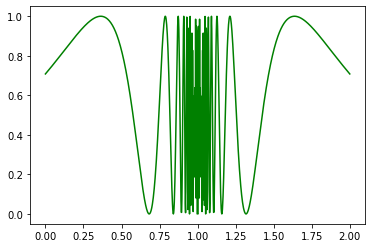

In [5]:
import matplotlib.pyplot as plt
def f(x):
    return np.sin(1/(1-x))**2

N = 1000
x = np.linspace(0, 2, N)
plt.plot(x, f(x), 'g-')

count = 0
for i in range(N):
    x = 2*np.random.random()
    y = np.random.random()
    if y < f(x): 
        count += 1
I_1 = 2*count/N
print("hit/miss : mean :",I_1)
x = np.linspace(0, 2, N)
I_2 = (2/N )*np.sum(f(x))
print("mean value : mean :",I_2)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [8]:
T = 100000
count_for_area = 0
dimension = 2
for i in range(T):
    x = -1+2*np.random.random()
    y = -1+2*np.random.random()
    if (x**2+y**2 <= 1):
        count_for_area += 1        
Area = ((2**dimension)/T)*count_for_area 
print('Area for the circle:',Area)

count_for_area = 0
dimension = 10
vector_per_dimension = np.zeros(dimension)
for i in range(T):
    r = 0
    for n in range(dimension):
        vector_per_dimension[n] = -1+2*np.random.random()
    if (np.sum(vector_per_dimension**2) <= 1):
        count_for_area += 1
I = ((2**dimension)/T)*count_for_area 
print('Extension for dimension 10:',I)

Area for the circle: 3.1355600000000003
Extension for dimension 10: 2.57024


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [3]:
import numpy as np
n = 100000
def w(x):
    return x**(-1 / 2)
def f(x):
    return x**(-1 / 2) / (np.exp(x) + 1)  
x = np.random.random(n) ** 2  
I_repeat = 50
I_list = []
for i in range(I_repeat):
    I = 1 / n * np.sum(f(x) / w(x)) * 2
    I_list.append(I)
            
print( np.mean(I_list))

0.8394347669156886
